<a href="https://colab.research.google.com/github/MonitSharma/Quantum-Finance-and-Numerical-Methods/blob/main/Grover's_Algoroithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm

In this tutorial, we'll explain the Grover's algorithm and how it's used to solve unstructured search problems.


We'll then implement this on qiskit

## Introduction

One of the advantages that quantum computer has over a classical one is the superior speed in searching databases. Grover's algorithm demonstrates this capability. 

This algorithm can speed up an unstructured search problem quadratically, **it can serve as a general trick or subroutine to obtain quadratic run tume improvements for variety of other algorithms. This is called the amplitude amplification trick**

## Unstructured Search

Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner $w$. 

Think of each items in the list as a box of a particular color. Say all items in the list are gray except the winner $$, which is purple 

![Grover Image](https://qiskit.org/textbook/ch-algorithms/images/grover_list.png)


--------


To find the *marked* item , using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. 

On a quantum computer, however we can find the marker item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification algorithm.


------

A quadratic speedup is indeed a substantial time saver for finding marked items in long lists. Additionally the algorithm does not use the list's internal structure , which makes it *generic*; this is why it immediately provides a quadratic quantum speed-up for many classical problem.

## Creating an Oracle

For example: our 'database' is comprised of all the possible computational basis states our qubits can be in . 

For example , if we have $3$ qubits, our list in the states $|000\rangle, |001\rangle, \dots |111\rangle$ (i.e the states $|0⟩ → |7⟩$




------

Grover's algorithm solves oracles that add a negative phase to the solution states, i.e for any state $|x⟩$ in the computational basis:

$$ U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}$$



The oracle will be a diagnol matrix, where the entry correspnd to the marker item will have a negative phase, For example, if we have three qubits, and $w = 101$ , our oracle will have the matrix:


$$ U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned} $$





------

What makes **Grover's Algorithm** so powerful is how easy it is to convert a problem to an oracle of this form. there are many computational problems in which it's difficult to *find a solution*, but relaticily easy to *verify* a solution.


Our oracle can thus be described as:

$$ U_\omega|x\rangle = (-1)^{f(x)}|x\rangle $$ 
and the oracle matrix will be a diagnol matrix of the form:

$$ U_\omega = 
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix} $$


where the function $f$ is simply:

$$ f(x) = \bigg\{
\begin{aligned}
\phantom{-}0 \quad \text{if} \; x \neq \omega \\
1 \quad \text{if} \; x = \omega \\
\end{aligned}$$

### Circuit Construction of a Grover Oracle

If we have our classical function $f(x)$, we can convert it to a reversible circuit of the form:

![](https://qiskit.org/textbook/ch-algorithms/images/grover_boolean_oracle.svg)

If we intialise the 'output' qubit in the state $|-⟩$, the phase kickback effect turns this into a Grover oracle

![](https://qiskit.org/textbook/ch-algorithms/images/grover_phase_oracle.svg)

We then ignore the auxiliary $(|-\rangle)$ qubit.

# Amplitude Amplification

Before looking at the list of items, we have no idea where the marked item is. 
Therfore any guess of its location is as good as any other, which can be expressed in terms of a uniform superposition: 
$$ |s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x
\rangle. $$


If at this point we were to measure in the standard basis $\{ | x \rangle \}$, this superpositon will collapse, according to the fifth quantum law, to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^n}$. Our chances of guessing the right value of $w$ is therefore $1$ in $2^n$ , as could be expected. Hence on avergae we would need to try about $N/2 = 2^{n-1}$ times to guess the correct item.




Using the **amplitude amplification** , which is how a quantum computer significantly enhances this probability. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items amplitude , so that measuring the final state will return the right item with near certainity.




-------


This algorithm have a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. 

The only two special states we need to consider are the winner $|w⟩$ and the unifrom superpositin |s⟩$.

These two vectors span a two-dimensional plane in the vector space $ \mathbb{C}^N. $. They are nor quite prependicular because $|w⟩$ occurs in the superposition with aplitude $N^{-1/2}$ as well. We can, however introduce an additional state $|s^{\prime}⟩$ that is in the span of these two vectors and is prependicular to $|w⟩$ and is obtained from $|s⟩$ by removing $|w⟩$ and rescaling.

## How dies Amplitude Amplification works?

**Step 1:** The amplitude amplification procedure starts out in the uniform superposition $|s⟩$ which is easily constructed from $ | s \rangle = H^{\otimes n} | 0 \rangle^n $

![Image here ](https://qiskit.org/textbook/ch-algorithms/images/grover_step1.jpg)


The left graphic corresponds to the two-dimensional plane spanned by perpendicular vectors $|w⟩$ and $|s^{\prime}⟩$  which allows to express the initial state as:

$$ |s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$$ 
where $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$ . 

The right graphic is a bar graph for the amplitudes of the state $|S⟩$


**Step 2:** We apply the oracle reflection $U_f$ to the state $|s⟩$


![oracle from Matrix 2](https://qiskit.org/textbook/ch-algorithms/images/grover_step2.jpg)


Geometrically this corresponds to a reflection of the state $|s⟩$ about $|s^{\prime}⟩$. This transformatuon means that the amplitude in front of the $|w\rangle$ becomes negative, which in turn means that the average amplitude has been lowered.

**Step 3:** We now apply an additional reflection $(U_s)$ about the state $|s⟩:$

$$ U_s = 2|s\rangle\langle s| - I $$

The transformation maps the state to $U_s U_f| s \rangle$ and completes the transformation.


![](https://qiskit.org/textbook/ch-algorithms/images/grover_step3.jpg)

Two reflections corresponds to a rotation. The transformation $U_s U_f$ rotates the initial state $|s⟩$ closer towards the winner $|w⟩$. The action of the reflection $U_s$ in the amplitude bar diagram can be understood as reflection about the average amplitude.

Since the average amplitude has been lowered by the first reflection, this transformation boosts the negative amplitude of $|w⟩$ to roughly three times its original value, while it descreases the other amplitudes .We then go to **step 2** to repeat the application. This procedure will be repeated several times to zero in on the winner.



----------------------


After $t$ steps we will be in the state $|\psi_t⟩$ where : $| \psi_t \rangle = (U_s U_f)^t  | s \rangle.$

---------------

**How many times do we need to apply the rotation?**

It turns out that roughly $\sqrt{N}$ rotations suffice. This becomes clear when looking at the amplitudes of the state $|\psi⟩$. We can see that the amplitude of $|w⟩$ grows linearly with the number of applicantions $\sim tN^{-1/2}$.

However, since we are dealing with amplitudes and not probabilities, the vector space's dimensions enters as a square root. Therefore it is the amplitude, and not the probability, that is being amplified in this procedure.


In the case that there are multiple solutions $M$, it can be shown that roughly $\sqrt{N/M}$ rotations will suffice.


![](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_high_level.png)



In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Exampler : 2 Qubits

Let's have a look at the case for $N=4$ whihc is realised with $2$ qubits. In this case, only **one rotation** is required to rotate the initial state $|s⟩$ to the winner $|w⟩$.


1. Following the above introduction, in the case of $N=4$ we have:
  $$ \theta = \arcsin \frac{1}{2} = \frac{\pi}{6}. $$

2. After $t$ steps, we have:

    $$ (U_s U_\omega)^t  | s \rangle = \sin \theta_t | \omega \rangle + \cos \theta_t | s' \rangle , $$

  where

  $$ \theta_t = (2t+1)\theta. $$

3. In order to obtain $|w⟩$ we need $\theta_t = \frac{\pi}{6}$ inserted above results to $t=1$. This implies that after $t=1$ rotations the search element is found.

#### Oracle for $|w⟩ = |11⟩$

let's loo at the case for $|w⟩ = |11⟩$. The oracle $U_w$ in this case acts as follows:

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$


or:

$$U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}$$

This is the controlled-Z gate. Thus, for this example, our oracle is simply the controlled Z-gate:
![](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_2qbuits_oracle_11.svg)



##### Reflection $U_s$

In order to complete the circuit, we need to implement the additional reflection $U_s = 2|s\rangle\langle s| - I$. Since this reflection is about $|s^{\prime}⟩$, we want to add a negative phase to every state orthogonal to $|s^{\prime}⟩$

One way we can do this is to use the operation that transforms the state $|s⟩ → |0⟩$, which we already know is the hadamard gate applied to each qubit.


$$  H^{\otimes n}|s\rangle = |0\rangle $$


Then we apply a circuit that adds a negative phase to the states orthogonal to $|0⟩$:

$$ U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right) $$

the signs of each of the state are flipped excpet for $|00⟩$. One way of implemneting this is creating the following circuit:
![](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_2qbuits_reflection_0.svg)


---------------

Finally we do the operation that transforms the state $|0\rangle → |s⟩$

$$ H^{\otimes n}U_0 H^{\otimes n} = U_s $$

The circuit looks like this:
![](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_2qbuits_reflection.svg)





## Full Circuit for $|w⟩ = |11⟩$

Since in this case $N=4$ only one rotation is required.
![](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_2qubits_full_11.svg)

## Implementation

In [ ]:
# import basic python lib
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numeric calculations

# import the qiskit packages
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

from qiskit.visualization import plot_histogram

Make a quantum circuit with two qubits:

In [ ]:
n = 2
grover_circuit = QuantumCircuit(2)

Let's make the state $|s⟩$ the superposition state

In [ ]:
def initialize_s(qc,qubits):
  for _ in qubits:
    qc.h(_)
  return qc

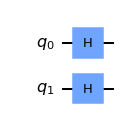

In [ ]:
grover_circuit = initialize_s(grover_circuit,[0,1])
grover_circuit.draw('mpl')

Apply the Oracle for $|w⟩  = |11⟩$. This oracle is specific for $2$ qubits:

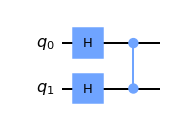

In [ ]:
grover_circuit.cz(0,1)
grover_circuit.draw('mpl')

We now apply the diffuser $U_s$,

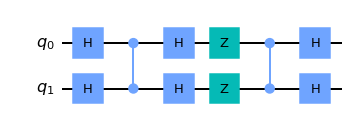

In [ ]:
# the diffusion operator
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

This is the final circuit.

## Running on Simulators

Verify that we have the correct statevector:

In [ ]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()


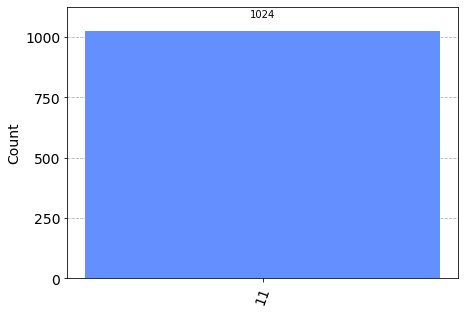

In [ ]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

### Run on Real Devices

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('c5a303670922a83ac5699dc2fea334193919a9e2fe6943debde1ac52815df5e39c6a137e05136088f3a7715e8d6dbd10097baf193df1fa22206a85931166946f',overwrite=True)

In [ ]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_quito


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


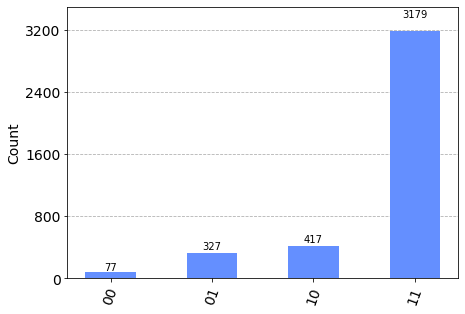

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

We confirm that in the majority of the cases the state $|11⟩$ is measured. The other results are due to error in the quantum computation.

## Example: $3$ Qubits

We now work throught he example of $3$ qubits and two marked states. $|101⟩$ and $|110⟩$. The quantum circuit to solve the problem using phase oracle is:
![](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_3qubits.png)

1. Apply the Hadamard gate to $3$ qubits initialized to $|000⟩$ to create a uniform superposition:

$$\lvert \psi_1 \rangle = \frac{1}{\sqrt{8}} \left( 
    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
    \lvert100\rangle + \lvert101\rangle + \lvert110\rangle + \lvert111\rangle \right)$$


2. Mark states $|101⟩$ and $|110⟩$ using a phase oracle:

$$\lvert \psi_2 \rangle = \frac{1}{\sqrt{8}} \left( 
    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
    \lvert100\rangle - \lvert101\rangle - \lvert110\rangle + \lvert111\rangle \right)$$

3. Perform the reflection around the average amplitude:
  1. Apply Hadamard to the qubits:
  $$\lvert \psi_{3a} \rangle = \frac{1}{2} \left(         \lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)$$

  2. Apply $X$ gate to the qubits:
  $$ \lvert \psi_{3b} \rangle = \frac{1}{2} \left(         -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle +\lvert111\rangle \right)$$

  3. Apply a doubly controlled $Z$ gate between the $1,2$ and $3$ qubits
  $$\lvert \psi_{3c} \rangle = \frac{1}{2} \left(         -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)$$

  4. Apply $X$ gate to the qubits
  
  $$\lvert \psi_{3d} \rangle = \frac{1}{2} \left(         -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right)$$

  5. Apply Hadamard gates to the qubits:

  $$\lvert \psi_{3e} \rangle = \frac{1}{\sqrt{2}} \left(         -\lvert101\rangle -\lvert110\rangle \right)$$


4. Measure the $3$ qubits to retrieve states $|101⟩$ and $|101⟩$


-----------------
Note that since there are $2$ solutioons and $8$ possibilities, we will only need to run one iteration



## Qiskit Implementation



In [ ]:
# make the phase oracle
qc = QuantumCircuit(3)
qc.cz(0,2)
qc.cz(1,2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

We'll make a general diffuser for $n$ qubit system

Remeber that we can create $U_s$ from $U_0$:
$$ U_s = H^{\otimes n} U_0 H^{\otimes n} $$

And a multi-controlled-Z gate $MCZ$ inverts the phase of the states $|11.....1⟩$:

$$MCZ = 
\begin{bmatrix}
 1 & 0 & 0 & \cdots & 0 \\
 0 & 1 & 0 & \cdots & 0 \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0 & 0 & \cdots & -1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\leftarrow \text{Add negative phase to} \; |11\dots 1\rangle\\
\end{aligned}$$


----

Applying an $X-$gate to each qubit performs the transformations:

$$\begin{aligned}
|00\dots 0\rangle & \rightarrow |11\dots 1\rangle\\
|11\dots 1\rangle & \rightarrow |00\dots 0\rangle
\end{aligned}$$

So:
$$U_0 = - X^{\otimes n} (MCZ) X^{\otimes n}$$

Using these properties together, we can create $U_s$ using $H-$ gates, $X-$ gates and a single multi controlled $Z$ gate:

$$ U_s = - H^{\otimes n} U_0 H^{\otimes n} = H^{\otimes n} X^{\otimes n} (MCZ) X^{\otimes n} H^{\otimes n} $$

We can ignore the global phase of $-1$


In [ ]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

We'll now put the pieces together, with the creation of a uniform superposition at the start of the circuit and a measurement at the end. Note that since there are 2 solutions and 8 possibilities, we will only need to run one iteration

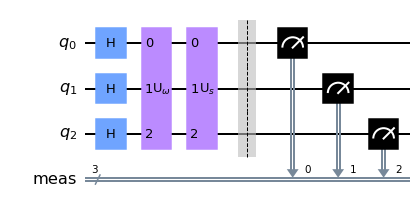

In [ ]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

## Run on simulators

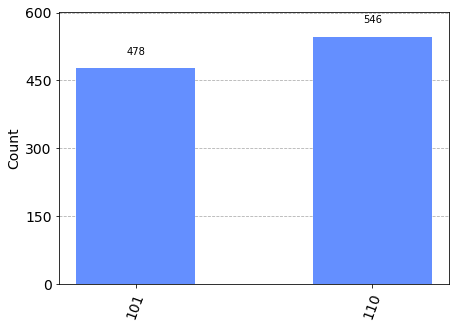

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

As we can see our device marked the states $|101⟩$ and $|110⟩$

### Running on real devices


In [ ]:
backend = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


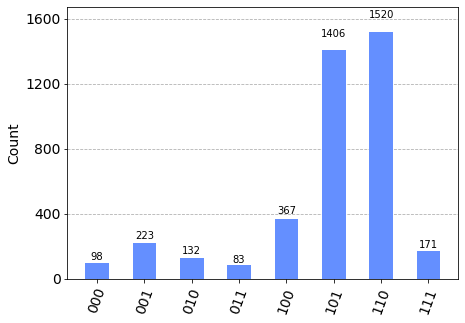

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)